In [76]:
# Attempt to "fuse" RGB images from Sentinel 2 satellite images of Msida, Malta
# Raw data collected 17th July 2018
# Images are "registered" upon export from SNAP program
# NIR (842 nm) image also in directory but unused
import os
this_path = os.getcwd()

In [77]:
# get file names
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(this_path) if isfile(join(this_path, f))]

In [78]:
# Import image data from the directory
from scipy import misc
from numpy import *
image1 = misc.imread(onlyfiles[1],flatten=1)

# Weighting factors for RGG -> monochrome conversion
RGB_factor = [0.2989, 0.5870, 0.1140]

# Initialise empty arrays to write to
RGB_flat = empty([shape(image1)[0],shape(image1)[1],3])
RGB_weight = empty([shape(image1)[0],shape(image1)[1],3])

# BMP files extracted from SNAP in order GRB, must be reordered RGB for image.
# "Band02" = blue, "Band03" = green, "Band04" = red; search for band identity
# in filename string, then write to RGB__ array in correct order (RGB)
for x in range(4):
    if onlyfiles[x+1][24:26] =='02':
        j = 2
    elif onlyfiles[x+1][24:26] == '03':
        j = 1
    elif onlyfiles[x+1][24:26] == '04':
        j = 0
    else:
        continue # skip to next iteration if R,G or B string identifier not found
    
    # append individual colour bmp data to RGB array(s)
    RGB_flat[:,:,j] = misc.imread(onlyfiles[x+1],flatten=1) # no wieghting
    RGB_weight[:,:,j] = RGB_factor[j]*(misc.imread(onlyfiles[x+1],flatten=1))#RGB weighting

# normalise arrays for subsequent plotting
RGB_flat = RGB_flat/amax(RGB_flat)
RGB_weight = RGB_weight/amax(RGB_weight)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(-0.5, 1020.5, 599.5, -0.5)

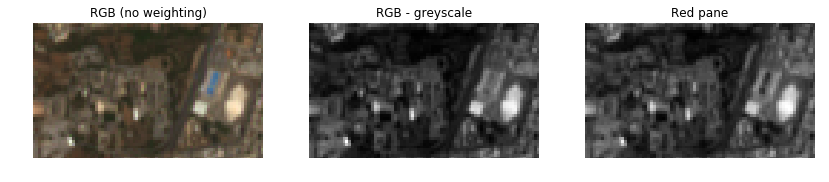

In [79]:
# plot unweighted RGB image in colour, greyscale and blue from only for comparison 
%matplotlib inline
import matplotlib.pyplot as plt
# set plot window size
plt.rcParams['figure.figsize'] = [14, 14]

# unweighted RGB image in colour
plt.subplot(1, 3, 1)
plt.imshow(RGB_flat)
plt.title('RGB (no weighting)')
plt.axis('off')

# weighted RGB image in greyscale
plt.subplot(1,3,2)
plt.imshow(sum(RGB_weight,axis=2),cmap = 'gray')
plt.title('RGB - greyscale')
plt.axis('off')

# Blue pane only
plt.subplot(1,3,3)
plt.imshow(RGB_flat[:,:,0],cmap = 'gray')
plt.title('Red pane')
plt.axis('off')
